In [1]:
import numpy as np # do array operations
import matplotlib.pyplot as plt # show image
import os # iterate through directory and join path
import cv2 # do image operations
import random

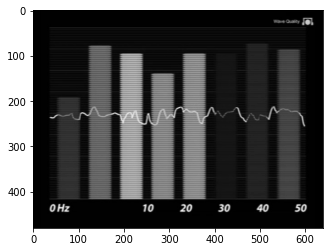

In [2]:
DATADIR = "converted" 
CATEGORIES = ["Active", "Sleep"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dogs or cats dir
    for img in os.listdir(path): # all images named by numbers
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # convert images to array, read path and in image, convert to grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array) # data in 2D array
print(img_array.shape) # size of images should be normalized -> same shape simple

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(480, 640)


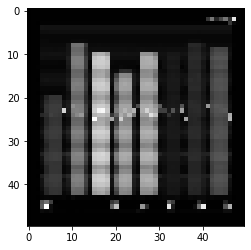

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # change image sizes to 50x50
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to dogs or cats dir
        class_num = CATEGORIES.index(category) # features are but label/classification is yet not a number (0 = dog, 1 = cat -> index value)
        for img in os.listdir(path): # all images named by numbers
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # convert images to array, read path and in image, convert to grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # change image sizes to 50x50
                training_data.append([new_array, class_num]) # append to new array in whatever classification
            except Exception as e: # some images are broken, normally look what error is
                pass

create_training_data()

In [6]:
print(len(training_data)) # training data should be properly balanced -> in case of binary, should be 50/50

1205


In [7]:
random.shuffle(training_data) # shuffle data to let NN to learn properly

In [8]:
for sample in training_data[:10]:
    print(sample[1]) # sample[0]: image array

0
0
1
1
1
1
1
0
1
0


In [9]:
X = [] # feature set
y = [] # labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # how many features we have, image size, grayscale

In [10]:
np.save("X.npy", X) # save array as .npy
np.save("y.npy", y)
X = np.load("X.npy") # load npy
y = np.load("y.npy") 

In [11]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
X = np.load("X.npy") # load npy
y = np.load("y.npy") 

In [13]:
NAME = "64x2-CNN-ActSle-{}".format(int(time.time())) # prevent appending (overwriting) model

In [18]:
X = X/255.0 # image normalization

# MODEL ARCHITECTURE
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=X.shape[1:])) # Convolutional layer, window, skip -1 -> input shape dynamically
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) # Conv fits well with MaxPooling

model.add(Conv2D(64, (3,3))) # 2x64 Conv NN
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # Conv is 2D however Dense wants 1D dataset
model.add(Dense(64))

model.add(Dense(1)) # Output layer
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", # dogs and cats, 0 and 1
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1) # out-of-sample data 10%

model.save("64x2-CNN-ActSle.model")

Epoch 1/10
34/34 [==============================] - 3s 82ms/step - loss: 0.6958 - accuracy: 0.4917 - val_loss: 0.6939 - val_accuracy: 0.4711
Epoch 2/10
34/34 [==============================] - 3s 77ms/step - loss: 0.6936 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5289
Epoch 3/10
34/34 [==============================] - 3s 78ms/step - loss: 0.6933 - accuracy: 0.4945 - val_loss: 0.6933 - val_accuracy: 0.4711
Epoch 4/10
34/34 [==============================] - 3s 80ms/step - loss: 0.6935 - accuracy: 0.4945 - val_loss: 0.6938 - val_accuracy: 0.4711
Epoch 5/10
34/34 [==============================] - 3s 81ms/step - loss: 0.6933 - accuracy: 0.5037 - val_loss: 0.6936 - val_accuracy: 0.4711
Epoch 6/10
34/34 [==============================] - 3s 77ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6935 - val_accuracy: 0.4711
Epoch 7/10
34/34 [==============================] - 3s 90ms/step - loss: 0.6934 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.4711
Epoch 8/10
34

In [19]:
CATEGORIES = ["Active", "Sleep"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
model = tf.keras.models.load_model("64x2-CNN-ActSle.model")

prediction = model.predict([prepare("active_ss.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Sleep


In [21]:
prediction = model.predict([prepare("sleep_ss.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Sleep
